In [1]:
__author__ = "@Tssp"
__date__ = "19/10/21"
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from GPE_Split_Step_Fourier import GPE_Solver_2D
import os
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
ref_ticksize = 16
plt.rcParams['xtick.labelsize']=ref_ticksize
plt.rcParams['legend.fontsize']=ref_ticksize
plt.rcParams['ytick.labelsize']=ref_ticksize
plt.rcParams['axes.labelsize']=ref_ticksize * 3/2
plt.rcParams['axes.titlesize']=ref_ticksize * 3/2

In [5]:
Xi          = 4   # Healing length
Nx          = 128  # Number of grid points
Ny          = 128
dX          = 1/Xi  # Cell size
dY          = 1/Xi
Lx          = Nx*dX
Ly          = Ny*dY
x           = np.arange(-Lx/2, Lx/2, dX, dtype=complex)
y           = np.arange(-Ly/2, Ly/2, dY, dtype=complex)
X, Y        = np.meshgrid(x, y)
dT          = 0.01 # Time step size
kx          = 2*pi*np.fft.fftfreq(Nx, d=dX)
ky          = 2*pi*np.fft.fftfreq(Ny, d=dY)
Kx, Ky      = np.meshgrid(kx, ky)
g           = 1e-2
figure_path = 'Figures/Vortex2D'
os.makedirs(figure_path, exist_ok=True)

In [6]:
def V(X):
    return np.ones(X.shape)*0

V = V(X)

In [7]:
# We start with a homogeneus background density
rho = 1/(g*Xi**2)
N   = rho*Nx*Ny
print(f"Homogeneus background density: {rho}\nTotal number of particles: {N}")

Homogeneus background density: 6.25
Total number of particles: 102400.0


In [8]:
def create_condensed_grid(Nx, Ny, N):
    grid = np.zeros((Nx, Ny), dtype="complex")
    # Fill the condensate mode k=0 with all particles
    grid[0,0] = np.sqrt(N/2)*(1 + 1j)
    # Fourier transform to obtain real space grid for further manipulations
    grid = np.fft.fft2(grid)/np.sqrt(Nx*Ny)
    return grid

In [31]:
def vortex2D(grid, x_pos, y_pos, l, N, g):
    grid_h = grid
    
    f0 = np.sqrt(N / (grid.shape[0]*grid.shape[1]))
    xi = 1. / (2*f0*np.sqrt(g))

    sn = int(l/np.sqrt(l*l))
    wn = int(np.sqrt(l*l))
    
    for x2 in np.arange(0, grid.shape[0]):
        for y2 in np.arange(0, grid.shape[1]):
            rho = x_pos - x2 + 1j*sn*(y_pos-y2)
            rho *= (1. / xi / np.sqrt(2. + np.abs(rho)**2/xi/xi))
            rho = rho**wn
            grid_h[x2,y2] *= rho
        
    return grid_h

# 1 Vortex 

In [32]:
X = create_condensed_grid(Nx, Ny, N)
grid = vortex2D(X, 64, 64, -2, N, g)
grad = np.gradient(np.angle(grid))

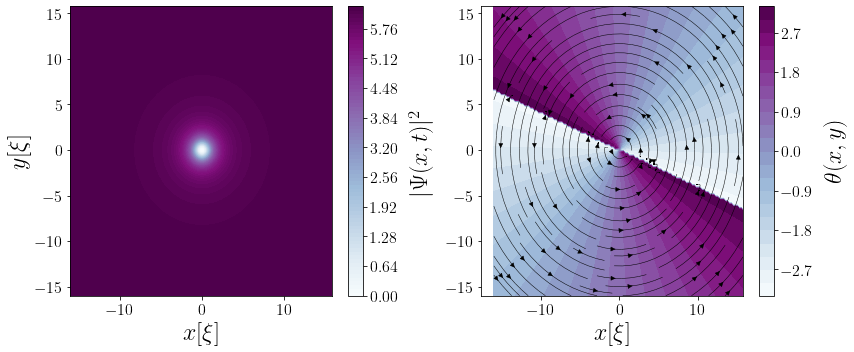

In [33]:
fig = plt.figure(figsize=(12,5), facecolor="white")

ax1 = plt.subplot(121)
cd = ax1.contourf(np.real(x), np.real(y), np.abs(grid)**2, levels=100, cmap='BuPu')
cbar = plt.colorbar(cd)
cbar.ax.set_ylabel(r'$|\Psi(x,t)|^2$', labelpad=10)
ax1.set_xlabel(r'$x[\xi]$')
ax1.set_ylabel(r'$y[\xi]$')

ax2 = plt.subplot(122)
c = ax2.contourf(x, y, np.angle(grid), levels=20, cmap='BuPu')
cbar = plt.colorbar(c)
cbar.ax.set_ylabel(r'$\theta(x,y)$', labelpad=10)
#cbar.set_ticks([-np.pi, 0, pi])
#cbar.ax.set_yticklabels([r'$-\pi$', '0', r'$\pi$'])
plt.streamplot(np.real(x), np.real(y), np.real(grad[1]), np.real(grad[0]), color='k',\
               density=1, linewidth=0.5)
ax2.set_xlabel(r'$x[\xi]$')

plt.tight_layout()
plt.savefig(figure_path+'/GPE_Vortex2D_l2.png', dpi=200)

# 2 Vortices

In [34]:
X = create_condensed_grid(Nx, Ny, N)
grid_vortex = vortex2D(X, Lx*2, Ly, 2, N, g)
grid_vortex = vortex2D(grid_vortex, Lx*2, 3*Ly, -2, N, g)
grad = np.gradient(np.angle(grid_vortex))

<ipython-input-35-b6eb70a97382>:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_tight" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(figure_path+'/GPE_TwoVortex2D_l2.png', dpi=200, bbox_tight=True)


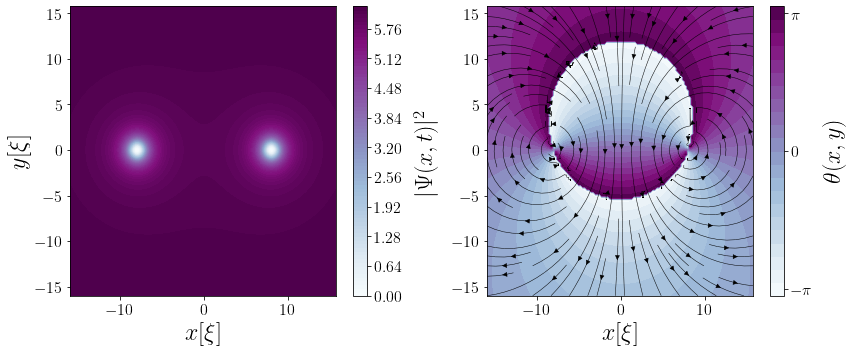

In [35]:
fig = plt.figure(figsize=(12,5), facecolor="white")

ax1 = plt.subplot(121)
cd = ax1.contourf(np.real(x), np.real(y), np.abs(grid_vortex)**2, levels=100, cmap='BuPu')
cbar = plt.colorbar(cd)
cbar.ax.set_ylabel(r'$|\Psi(x,t)|^2$', labelpad=10)
ax1.set_xlabel(r'$x[\xi]$')
ax1.set_ylabel(r'$y[\xi]$')

ax2 = plt.subplot(122)
c = ax2.contourf(x, y, np.angle(grid_vortex), levels=20, cmap='BuPu')
cbar = plt.colorbar(c)
cbar.ax.set_ylabel(r'$\theta(x,y)$', labelpad=10)
cbar.set_ticks([-np.pi, 0, pi])
cbar.ax.set_yticklabels([r'$-\pi$', '0', r'$\pi$'])
plt.streamplot(np.real(x), np.real(y), np.real(grad[1]), np.real(grad[0]), color='k',\
               density=1, linewidth=0.5)
ax2.set_xlabel(r'$x[\xi]$')

plt.tight_layout()
plt.savefig(figure_path+'/GPE_TwoVortex2D_l2.png', dpi=200, bbox_tight=True)

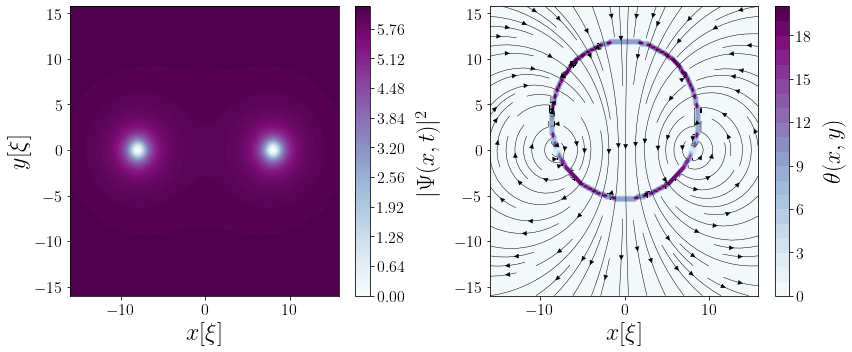

In [36]:
fig = plt.figure(figsize=(12,5), facecolor="white")

ax1 = plt.subplot(121)
cd = ax1.contourf(np.real(x), np.real(y), np.abs(grid_vortex)**2, levels=100, cmap='BuPu')
cbar = plt.colorbar(cd)
cbar.ax.set_ylabel(r'$|\Psi(x,t)|^2$', labelpad=10)
ax1.set_xlabel(r'$x[\xi]$')
ax1.set_ylabel(r'$y[\xi]$')

ax2 = plt.subplot(122)
c = ax2.contourf(x, y, grad[1]**2 + grad[0]**2, levels=20, cmap='BuPu')
cbar = plt.colorbar(c)
cbar.ax.set_ylabel(r'$\theta(x,y)$', labelpad=10)
plt.streamplot(np.real(x), np.real(y), np.real(grad[1]), np.real(grad[0]), color='k',\
               density=1, linewidth=0.5, integration_direction='both')
ax2.set_xlabel(r'$x[\xi]$')

plt.tight_layout()
#plt.savefig(figure_path+'/GPE_Soliton2D_14000.png', dpi=200)

# Lattice with vortices

In [15]:
X = create_condensed_grid(Nx, Ny, N)
# 4 vortex in each direction
grid_vortex = vortex2D(X, X.shape[0], 0, 2, N, g)
for i in range(0, 7):
    grid_vortex = vortex2D(grid_vortex, X.shape[0]-32*i, 0,  2*(-1)**i, N, g)
    grid_vortex = vortex2D(grid_vortex, X.shape[0]-32*i, 32, 2*(-1)**(i+1), N, g)
    grid_vortex = vortex2D(grid_vortex, X.shape[0]-32*i, 64, 2*(-1)**(i+2), N, g)
    grid_vortex = vortex2D(grid_vortex, X.shape[0]-32*i, 96, 2*(-1)**(i+3), N, g)
    grid_vortex = vortex2D(grid_vortex, X.shape[0]-32*i, 128,2*(-1)**(i+4), N, g)
grad = np.gradient(np.angle(grid_vortex))

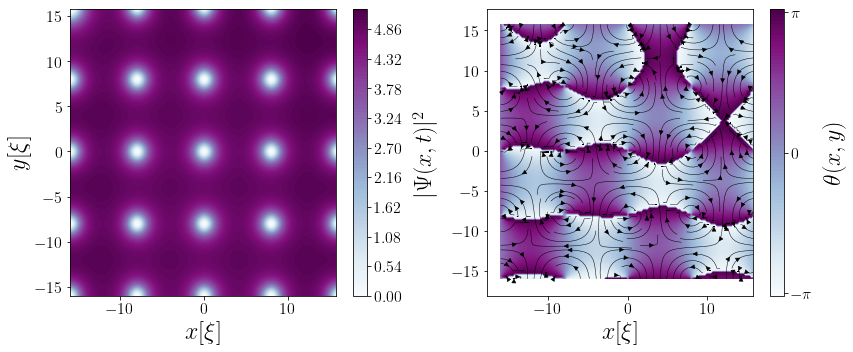

In [16]:
fig = plt.figure(figsize=(12,5), facecolor="white")

ax1 = plt.subplot(121)
cd = ax1.contourf(np.real(x), np.real(y), np.abs(grid_vortex)**2, levels=100, cmap='BuPu')
cbar = plt.colorbar(cd)
cbar.ax.set_ylabel(r'$|\Psi(x,t)|^2$', labelpad=10)
ax1.set_xlabel(r'$x[\xi]$')
ax1.set_ylabel(r'$y[\xi]$')

ax2 = plt.subplot(122)
c = ax2.contourf(x, y, np.angle(grid_vortex), levels=100, cmap='BuPu')
cbar = plt.colorbar(c)
cbar.ax.set_ylabel(r'$\theta(x,y)$', labelpad=10)
cbar.set_ticks([-np.pi, 0, pi])
cbar.ax.set_yticklabels([r'$-\pi$', '0', r'$\pi$'])
plt.streamplot(np.real(x), np.real(y), np.real(grad[1]), np.real(grad[0]), color='k',\
               density=1.3, linewidth=0.5)
ax2.set_xlabel(r'$x[\xi]$')

plt.tight_layout()
#plt.savefig(figure_path+'/GPE_TwoVortex2D_l2.png', dpi=200, bbox_tight=True)

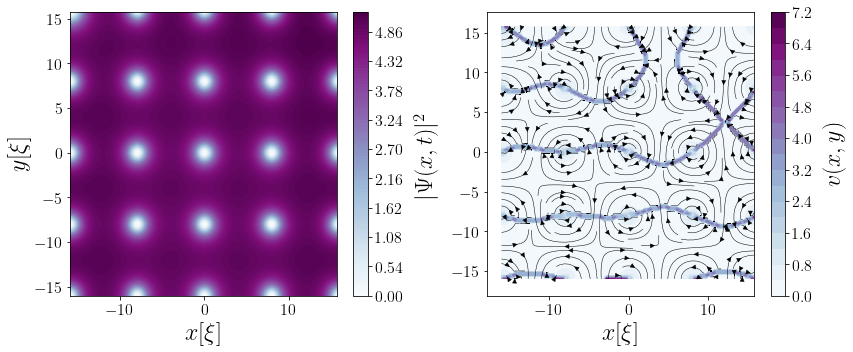

In [17]:
fig = plt.figure(figsize=(12,5), facecolor="white")

ax1 = plt.subplot(121)
cd = ax1.contourf(np.real(x), np.real(y), np.abs(grid_vortex)**2, levels=100, cmap='BuPu')
cbar = plt.colorbar(cd)
cbar.ax.set_ylabel(r'$|\Psi(x,t)|^2$', labelpad=10)
ax1.set_xlabel(r'$x[\xi]$')
ax1.set_ylabel(r'$y[\xi]$')

ax2 = plt.subplot(122)
c = ax2.contourf(x, y, np.sqrt(grad[1]**2 + grad[0]**2), levels=20, cmap='BuPu')
cbar = plt.colorbar(c)
cbar.ax.set_ylabel(r'$v(x,y)$', labelpad=10)
plt.streamplot(np.real(x), np.real(y), np.real(grad[1]), np.real(grad[0]), color='k',\
               density=1.3, linewidth=0.5, integration_direction='both')
ax2.set_xlabel(r'$x[\xi]$')

plt.tight_layout()
#plt.savefig(figure_path+'/GPE_Soliton2D_14000.png', dpi=200)